# 오픈소스 SW 활용 기말 프로젝트
#### 32202341 송지윤

### 주제: COVID-19와 cryptocurrency market의 상관 관계 분석 
- COVID pandemic으로 인해 컴퓨터 시장이 활발해졌고, 특히 그래픽 카드 비용이 전세계적으로 크게 증가하였다.
- 따라서 2020년 3월부터 2022년 3월까지의 미국의 COVID pandemic이 암호화폐 시장에 영향을 주었을 것이라 가정한다.
- 미국의 전체 코로나 상황 데이터와 CoinGecko API의 암호화폐 변화 데이터를 비교한다.
- 암호화폐 데이터는 현재 시가총액이 가장 높은 상위 5개의 데이터로 선정한다.

# Data 전처리 및 가공

### OWID의 Data on COVID-19 (coronavirus)
- Download our complete COVID-19 dataset -> CSV file 다운로드 -> owid-covid-data.csv
- https://github.com/owid/covid-19-data/tree/master/public/data


### Data read

In [1026]:
# import moudle cell

import pandas as pd
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import datetime

In [1027]:
# CSV파일 읽어 오기
df_owid = pd.read_csv('owid-covid-data.csv')

df_owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318399 entries, 0 to 318398
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    318399 non-null  object 
 1   continent                                   303273 non-null  object 
 2   location                                    318399 non-null  object 
 3   date                                        318399 non-null  object 
 4   total_cases                                 282164 non-null  float64
 5   new_cases                                   309582 non-null  float64
 6   new_cases_smoothed                          308318 non-null  float64
 7   total_deaths                                261272 non-null  float64
 8   new_deaths                                  309633 non-null  float64
 9   new_deaths_smoothed                         308403 non-null  float64
 

### column 확인 및 filtered 데이터프레임 생성
- iso_code : 국제 표준 국가 코드
- location : 국가 이름
- date : 일자
- total_cases : 전체 확진자 수
- population : 인구

In [1028]:
df_owid_filtered=df_owid[['iso_code', 'location', 'date', 'total_cases', 'population']]
df_owid_filtered

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-03,NaN,41128772.0
1,AFG,Afghanistan,2020-01-04,NaN,41128772.0
2,AFG,Afghanistan,2020-01-05,NaN,41128772.0
3,AFG,Afghanistan,2020-01-06,NaN,41128772.0
4,AFG,Afghanistan,2020-01-07,NaN,41128772.0
...,...,...,...,...,...
318394,ZWE,Zimbabwe,2023-06-10,265161.0,16320539.0
318395,ZWE,Zimbabwe,2023-06-11,265161.0,16320539.0
318396,ZWE,Zimbabwe,2023-06-12,265289.0,16320539.0
318397,ZWE,Zimbabwe,2023-06-13,265289.0,16320539.0


In [1029]:
# 데이터프레임에서 미국 데이터를 추출하기 위해 지역 데이터 추출
location = df_owid['location'].unique()
location

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [1030]:
# 미국 데이터 프레임 생성
df_usa = df_owid_filtered[df_owid_filtered.location=='United States']

df_usa.head()

,iso_code,location,date,total_cases,population
299596,USA,United States,2020-01-03,NaN,338289856.0
299597,USA,United States,2020-01-04,NaN,338289856.0
299598,USA,United States,2020-01-05,NaN,338289856.0
299599,USA,United States,2020-01-06,NaN,338289856.0
299600,USA,United States,2020-01-07,NaN,338289856.0


In [1031]:
# 결측치 제거
df_usa=df_usa.dropna()
df_usa

,iso_code,location,date,total_cases,population
299613,USA,United States,2020-01-20,1.0,338289856.0
299614,USA,United States,2020-01-21,1.0,338289856.0
299615,USA,United States,2020-01-22,1.0,338289856.0
299616,USA,United States,2020-01-23,1.0,338289856.0
299617,USA,United States,2020-01-24,1.0,338289856.0
...,...,...,...,...,...
300850,USA,United States,2023-06-10,103436829.0,338289856.0
300851,USA,United States,2023-06-11,103436829.0,338289856.0
300852,USA,United States,2023-06-12,103436829.0,338289856.0
300853,USA,United States,2023-06-13,103436829.0,338289856.0


In [1032]:
# index 변경
df_usa_indexed=df_usa.set_index('date')
df_usa_indexed

,iso_code,location,total_cases,population
date,,,,
2020-01-20,USA,United States,1.0,338289856.0
2020-01-21,USA,United States,1.0,338289856.0
2020-01-22,USA,United States,1.0,338289856.0
2020-01-23,USA,United States,1.0,338289856.0
2020-01-24,USA,United States,1.0,338289856.0
...,...,...,...,...
2023-06-10,USA,United States,103436829.0,338289856.0
2023-06-11,USA,United States,103436829.0,338289856.0
2023-06-12,USA,United States,103436829.0,338289856.0


In [1033]:
# 기간 변경
df_usa_indexed=df_usa_indexed.loc['2020-03-01':'2022-03-31']
df_usa_indexed

,iso_code,location,total_cases,population
date,,,,
2020-03-01,USA,United States,73.0,338289856.0
2020-03-02,USA,United States,82.0,338289856.0
2020-03-03,USA,United States,100.0,338289856.0
2020-03-04,USA,United States,135.0,338289856.0
2020-03-05,USA,United States,186.0,338289856.0
...,...,...,...,...
2022-03-27,USA,United States,79303178.0,338289856.0
2022-03-28,USA,United States,79315689.0,338289856.0
2022-03-29,USA,United States,79325442.0,338289856.0


In [1034]:
df_usa_total_cases = df_usa_indexed['total_cases']
df_usa_total_cases

date
2020-03-01          73.0
2020-03-02          82.0
2020-03-03         100.0
2020-03-04         135.0
2020-03-05         186.0
                 ...    
2022-03-27    79303178.0
2022-03-28    79315689.0
2022-03-29    79325442.0
2022-03-30    79357869.0
2022-03-31    79381947.0
Name: total_cases, Length: 761, dtype: float64

In [1035]:
total_changes = []

for i in range(len(df_usa_total_cases)-1):    
    date=df_usa_total_cases.index[i]        
    total_today = df_usa_total_cases[i]     
    total_tomorrow = df_usa_total_cases[i+1] 
    # 전일대비 확진자 증가율 계산
    daily_change = ((total_tomorrow - total_today) / total_today) * 100
    total_changes.append((date, daily_change))

total_changes

[('2020-03-01', 12.32876712328767),
 ('2020-03-02', 21.951219512195124),
 ('2020-03-03', 35.0),
 ('2020-03-04', 37.77777777777778),
 ('2020-03-05', 37.634408602150536),
 ('2020-03-06', 30.46875),
 ('2020-03-07', 38.92215568862276),
 ('2020-03-08', 31.46551724137931),
 ('2020-03-09', 34.75409836065574),
 ('2020-03-10', 47.44525547445255),
 ('2020-03-11', 41.006600660066006),
 ('2020-03-12', 30.719719133996488),
 ('2020-03-13', 32.54252461951656),
 ('2020-03-14', 32.691658223573114),
 ('2020-03-15', 31.025706286586917),
 ('2020-03-16', 41.47241647241648),
 ('2020-03-17', 32.5278044761774),
 ('2020-03-18', 33.45420638209697),
 ('2020-03-19', 37.74551665243382),
 ('2020-03-20', 34.45302372766725),
 ('2020-03-21', 31.68594902749832),
 ('2020-03-22', 28.998885882540186),
 ('2020-03-23', 26.563849475632328),
 ('2020-03-24', 20.96705010723338),
 ('2020-03-25', 18.26445748178712),
 ('2020-03-26', 19.236535106846926),
 ('2020-03-27', 21.11531471808529),
 ('2020-03-28', 19.19879205398009),
 ('202

In [1036]:
df_total_changes=pd.DataFrame(total_changes)
df_total_changes

,0,1
0,2020-03-01,12.328767
1,2020-03-02,21.951220
2,2020-03-03,35.000000
3,2020-03-04,37.777778
4,2020-03-05,37.634409
...,...,...
755,2022-03-26,0.036221
756,2022-03-27,0.015776
757,2022-03-28,0.012296
758,2022-03-29,0.040878


In [1037]:
df_total_changes.columns=['date', 'total(%)']
df_total_changes

,date,total(%)
0,2020-03-01,12.328767
1,2020-03-02,21.951220
2,2020-03-03,35.000000
3,2020-03-04,37.777778
4,2020-03-05,37.634409
...,...,...
755,2022-03-26,0.036221
756,2022-03-27,0.015776
757,2022-03-28,0.012296
758,2022-03-29,0.040878


In [1038]:
df_total_changes=df_total_changes.set_index('date')
df_total_changes

,total(%)
date,
2020-03-01,12.328767
2020-03-02,21.951220
2020-03-03,35.000000
2020-03-04,37.777778
2020-03-05,37.634409
...,...
2022-03-26,0.036221
2022-03-27,0.015776
2022-03-28,0.012296


<Axes: xlabel='date'>

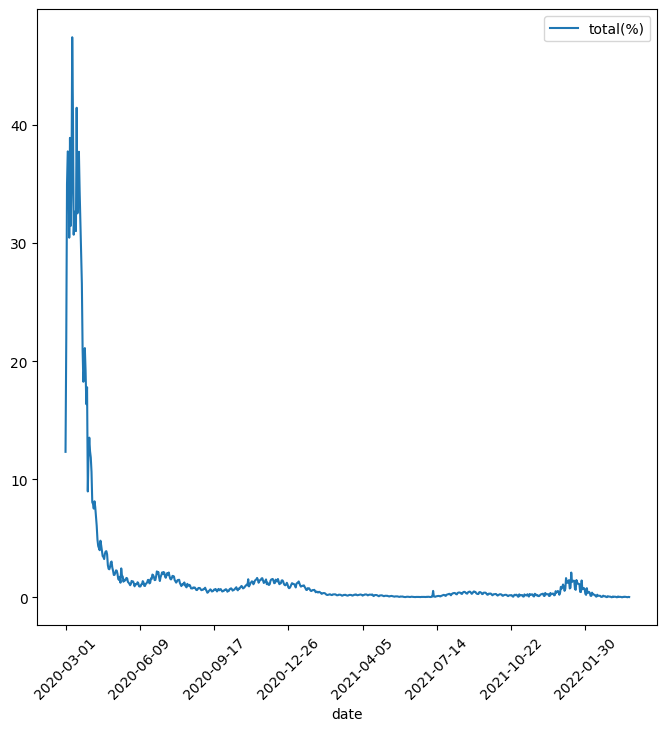

In [1039]:
df_total_changes.plot.line(rot=45)

### CoinGecko API의 open API 사용
- https://www.coingecko.com/ko/api/documentation

### Data read

In [1040]:
# 현재 암호화폐별 가격 데이터프레임 생성

# 현재 암호화폐 시세 API endpoint
url_coinprice = "https://api.coingecko.com/api/v3/coins/markets"

# 파라미터 설정
params = {
    "vs_currency": "krw",  
    "order": "market_cap_desc",
    "per_page": 100,       # 한 페이지 당 보여지는 코인 수 
    "page": 1              # 페이지 1의 코인
}

# 받아온 데이터로 데이터프레임 생성
response = requests.get(url_coinprice, params=params)
data_coinprice = response.json()
df_price=pd.DataFrame(data_coinprice)

df_price.head()


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,33825572.00,656693417753467,1,7.106545e+14,9.313355e+12,34011171.00,...,2.100000e+07,21000000.0,81339064.00,-58.36598,2021-11-10T14:24:11.849Z,75594.00,44698.28464,2013-07-05T00:00:00.000Z,None,2023-06-18T10:38:01.440Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2211675.00,265889328496451,2,2.658893e+14,4.896963e+12,2227615.00,...,1.202109e+08,NaN,5790811.00,-61.79295,2021-11-08T23:48:45.609Z,489.40,451979.75447,2015-10-20T00:00:00.000Z,"{'times': 86.42058675254786, 'currency': 'btc'...",2023-06-18T10:38:02.416Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1277.80,106201696852793,3,1.062017e+14,1.521435e+13,1280.17,...,8.317388e+10,NaN,1499.66,-14.86319,2018-07-24T00:00:00.000Z,656.75,94.40760,2015-03-02T00:00:00.000Z,None,2023-06-18T10:35:00.398Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,315838.00,49271598718470,4,6.322741e+13,6.743230e+11,317178.00,...,1.579002e+08,200000000.0,792895.00,-60.03098,2021-11-07T10:13:53.906Z,44.95,704917.81703,2017-10-19T00:00:00.000Z,None,2023-06-18T10:38:07.539Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1277.09,36238724828987,5,3.623872e+13,2.437832e+12,1279.72,...,2.834904e+10,NaN,1466.80,-12.89658,2022-09-30T02:11:16.560Z,1008.25,26.71742,2021-05-19T13:14:05.611Z,None,2023-06-18T10:38:04.120Z


### column 확인 및 filtered 데이터프레임 생성
- id : 암호화폐 id
- symbol : 암호화폐 symbol
- name : 암호화폐 이름
- current_price : 현재 가격
- market_cap : 시가 총액
- market_cap_rank: 시가 총액 순위

In [1041]:
# 필요 데이터만 추출하여 filtered 데이터프레임 생성
df_price_filtered=df_price[['id', 'symbol', 'name', 'current_price', 'market_cap', 'market_cap_rank']]
df_price_filtered

,id,symbol,name,current_price,market_cap,market_cap_rank
0,bitcoin,btc,Bitcoin,33825572.00,656693417753467,1
1,ethereum,eth,Ethereum,2211675.00,265889328496451,2
2,tether,usdt,Tether,1277.80,106201696852793,3
3,binancecoin,bnb,BNB,315838.00,49271598718470,4
4,usd-coin,usdc,USD Coin,1277.09,36238724828987,5
...,...,...,...,...,...,...
95,conflux-token,cfx,Conflux,237.57,499390633090,96
96,mina-protocol,mina,Mina Protocol,542.15,499305890079,97
97,kaspa,kas,Kaspa,27.05,487038822134,98
98,trust-wallet-token,twt,Trust Wallet,1146.26,478326056622,99


#### wordcloud와 treemap으로 암호화폐 순위 예측

##### treemap

In [1042]:
# treemap
fig = px.treemap(df_price_filtered, path=['name'], values='market_cap')
fig.show()

##### wordcloud

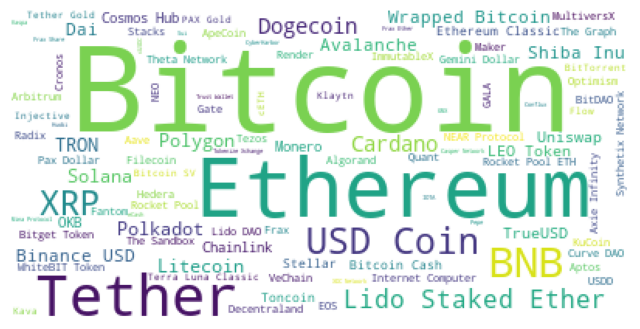

In [1043]:
# wordcloud

# 암호화폐 별 시가총액 데이터프레임 추출
df_listed=df_price_filtered[['name', 'market_cap']]
# 데이터프레임 인덱스 변경
df_listed=df_listed.set_index('name')
# 데이터프레임을 series로 변경
df_sereies=df_listed.squeeze()

# wordcloud 그리기
wordcloud_py = WordCloud(background_color = 'white').generate_from_frequencies(df_sereies.to_dict())

plt.rcParams['figure.figsize'] = (8, 8)
plt.imshow(wordcloud_py)
plt.axis('off')
plt.show()

In [1044]:
# 현재 시가 총액이 가장 높은 상위 5개 암호화폐 데이터프레임 생성
df_cointop10=df_price_filtered.head(5)
df_cointop10

,id,symbol,name,current_price,market_cap,market_cap_rank
0,bitcoin,btc,Bitcoin,33825572.00,656693417753467,1
1,ethereum,eth,Ethereum,2211675.00,265889328496451,2
2,tether,usdt,Tether,1277.80,106201696852793,3
3,binancecoin,bnb,BNB,315838.00,49271598718470,4
4,usd-coin,usdc,USD Coin,1277.09,36238724828987,5


### Bitcoin의 변화 데이터 추출 후 그래프 그리기

In [1045]:
# 기간 설정
start_date = datetime.datetime(2020, 3, 1)
end_date = datetime.datetime(2022, 3, 31)

In [1046]:
# BTD's API endpoint
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"

params = {
    "vs_currency": "usd",                      
    "from": int(start_date.timestamp()),
    "to": int(end_date.timestamp())                         
}

response = requests.get(url, params=params)

# Error exception 
if response.status_code == 200:
    data = response.json()
    
    # 비트코인 가격 정보 데이터프레임 생성
    prices = data["prices"]
    df_bitcoin=pd.DataFrame(prices)

else:
    print(f"Error retrieving Bitcoin price data: {response.status_code}")

df_bitcoin


,0,1
0,1583020800000,8552.989119
1,1583107200000,8567.802249
2,1583193600000,8905.876104
3,1583280000000,8756.718577
4,1583366400000,8758.646993
...,...,...
755,1648252800000,44331.777957
756,1648339200000,44510.844218
757,1648425600000,46715.117619
758,1648512000000,46994.879118


In [1047]:
df_bitcoin.columns=['timestamp', 'price']

for index, timestamp in enumerate(df_bitcoin['timestamp']):

    dt_object = datetime.datetime.fromtimestamp(timestamp/1000)
    formatted_date = dt_object.strftime("%Y-%m-%d")

    df_bitcoin.at[index, 'timestamp'] = formatted_date

print(df_bitcoin)


      timestamp         price
0    2020-03-01   8552.989119
1    2020-03-02   8567.802249
2    2020-03-03   8905.876104
3    2020-03-04   8756.718577
4    2020-03-05   8758.646993
..          ...           ...
755  2022-03-26  44331.777957
756  2022-03-27  44510.844218
757  2022-03-28  46715.117619
758  2022-03-29  46994.879118
759  2022-03-30  47459.261238

[760 rows x 2 columns]


### 기간 내 Bitcoin 가격 그래프

In [1048]:
df_bitcoin=df_bitcoin.rename(columns={'timestamp':'date'})
df_bitcoin

,date,price
0,2020-03-01,8552.989119
1,2020-03-02,8567.802249
2,2020-03-03,8905.876104
3,2020-03-04,8756.718577
4,2020-03-05,8758.646993
...,...,...
755,2022-03-26,44331.777957
756,2022-03-27,44510.844218
757,2022-03-28,46715.117619
758,2022-03-29,46994.879118


<Axes: xlabel='date'>

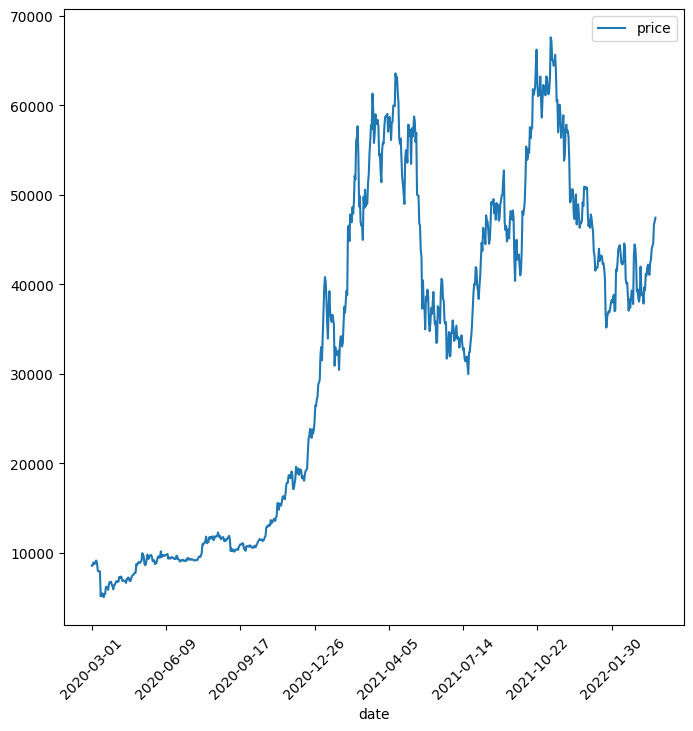

In [1049]:
df_bitcoin=df_bitcoin.set_index('date')
df_bitcoin.plot(kind='line', rot=45)

### 전날 대비 가격 변화 정도 그래프

In [1050]:
# 기간 내 하루 별 가격 변동 정도를 보여주는 데이터프레임 생성

# 날짜별 변동 정도를 저장하는 리스트 생성
price_changes = []

for i in range(len(prices)-1):
    date = prices[i][0]             # 날짜별 Timestamp 

    # timestamp를 date 형식으로 변환
    dt_object = datetime.datetime.fromtimestamp(date/1000)
    formatted_date = dt_object.strftime("%Y-%m-%d")

    price_today = prices[i][1]      # 날짜별 가격
    price_tomorrow = prices[i+1][1] # 다음날 가격
    daily_change = ((price_tomorrow - price_today) / price_today) * 100
    price_changes.append((formatted_date, daily_change))

price_changes

[('2020-03-01', 0.17319243474082355),
 ('2020-03-02', 3.945864362533396),
 ('2020-03-03', -1.6748214973287188),
 ('2020-03-04', 0.022022135717473208),
 ('2020-03-05', 3.199390616602375),
 ('2020-03-06', 1.0728635253292833),
 ('2020-03-07', -2.5574329931885202),
 ('2020-03-08', -9.66992679856721),
 ('2020-03-09', -1.4927008428209825),
 ('2020-03-10', -0.1843184755714088),
 ('2020-03-11', 0.36412658702394834),
 ('2020-03-12', -35.19026936118513),
 ('2020-03-13', 7.774252869820717),
 ('2020-03-14', -5.9289397296259905),
 ('2020-03-15', 3.5239275195997837),
 ('2020-03-16', -6.7698502696008145),
 ('2020-03-17', 7.092187336240996),
 ('2020-03-18', -0.24371894351701076),
 ('2020-03-19', 14.767083224037414),
 ('2020-03-20', 0.4117030655206853),
 ('2020-03-21', -0.8043221933576162),
 ('2020-03-22', -4.655615479585575),
 ('2020-03-23', 10.183207484098462),
 ('2020-03-24', 4.241195149472487),
 ('2020-03-25', -0.5092463446224649),
 ('2020-03-26', 1.0403598336089999),
 ('2020-03-27', -5.43540575511

In [1051]:
df_price_changes = pd.DataFrame(price_changes, columns=["Date", "Price Change"])
df_price_changes

,Date,Price Change
0,2020-03-01,0.173192
1,2020-03-02,3.945864
2,2020-03-03,-1.674821
3,2020-03-04,0.022022
4,2020-03-05,3.199391
...,...,...
754,2022-03-25,0.900585
755,2022-03-26,0.403923
756,2022-03-27,4.952217
757,2022-03-28,0.598867


In [1052]:
# 데이터프레임의 인덱스를 date로 변경
df_BTD_indexed=df_price_changes.set_index('Date')
df_BTD_indexed

,Price Change
Date,
2020-03-01,0.173192
2020-03-02,3.945864
2020-03-03,-1.674821
2020-03-04,0.022022
2020-03-05,3.199391
...,...
2022-03-25,0.900585
2022-03-26,0.403923
2022-03-27,4.952217


<Axes: xlabel='Date'>

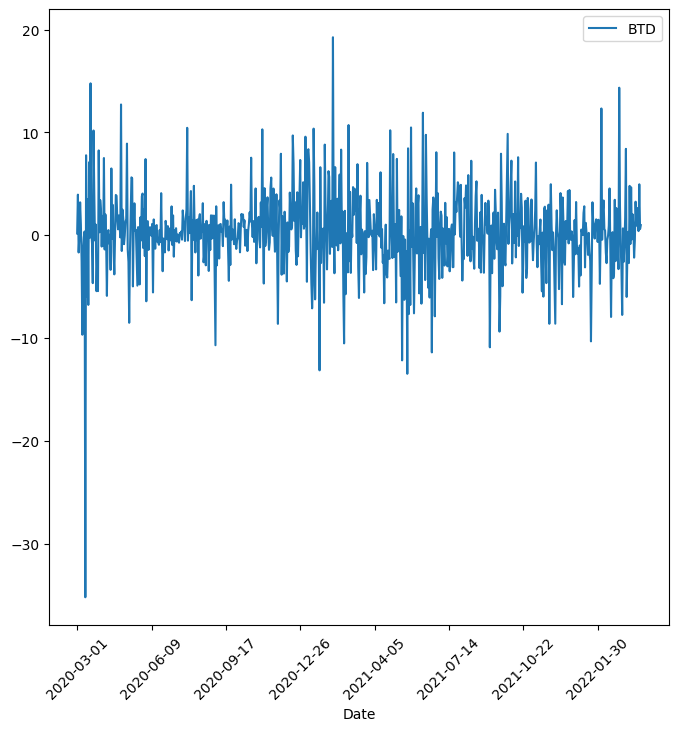

In [1053]:
# line graph 그리기
df_BTD=pd.DataFrame({
    'BTD' : df_BTD_indexed['Price Change']
}, index=df_BTD_indexed.index)

df_BTD.plot.line(rot=45)

### 현재 시가 총액이 가장 높은 상위 5개 암호화폐의 기간 내 데이터 받아오기

In [1054]:
# 현재 암호화폐 시세 API endpoint
url = "https://api.coingecko.com/api/v3/coins/markets"

params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 5,  # Top 5 암호화폐
    "page": 1
}

response = requests.get(url, params=params)

# Error check
if response.status_code == 200:
    data = response.json()

    # 암호화폐 이름, id, symbol 저장
    crypto_symbols = [coin["symbol"].upper() for coin in data]
    crypto_names = [coin["name"] for coin in data]
    crypto_ids=[coin['id'] for coin in data]

else:
    print("Error occurred while fetching data:", response.text)

In [1055]:
print(crypto_ids)
print(crypto_names)
print(crypto_symbols)

['bitcoin', 'ethereum', 'tether', 'binancecoin', 'usd-coin']
['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'USD Coin']
['BTC', 'ETH', 'USDT', 'BNB', 'USDC']


In [1056]:
# 각 암호화폐의 price date dataframe 저장할 dict 선언
dataframes={}

# 10개 암호화폐의 가격 변화 데이터 받아오기
for id in crypto_ids:
    # 암호화폐 별 차트 기록 url
    history_url = f"https://api.coingecko.com/api/v3/coins/{id}/market_chart/range"

    history_params = {
        "vs_currency": "usd",
        "from": int(start_date.timestamp()),
        "to": int(end_date.timestamp())
    }

    history_response = requests.get(history_url, params=history_params)

    # Error check
    if response.status_code == 200:
        history_data = history_response.json()

        if "prices" in history_data:
            prices_data = history_data["prices"]
            
            # 가격 데이터 받아 dict에 저장, key는 df_암호화폐id
            df = pd.DataFrame(prices_data)
            dataframes[f'df_{id}'] = df
        else:
            print(f"Error: 'prices' key not found in the API response for cryptocurrency {id}")
    
    else:
        print(f"Error retrieving Bitcoin price data: {response.status_code}")

In [1057]:
# price date dataframe 저장된 dict 확인
dataframes

{'df_bitcoin':                  0             1
 0    1583020800000   8552.989119
 1    1583107200000   8567.802249
 2    1583193600000   8905.876104
 3    1583280000000   8756.718577
 4    1583366400000   8758.646993
 ..             ...           ...
 755  1648252800000  44331.777957
 756  1648339200000  44510.844218
 757  1648425600000  46715.117619
 758  1648512000000  46994.879118
 759  1648598400000  47459.261238
 
 [760 rows x 2 columns],
 'df_ethereum':                  0            1
 0    1583020800000   218.348357
 1    1583107200000   218.939797
 2    1583193600000   231.679446
 3    1583280000000   223.960116
 4    1583366400000   224.134877
 ..             ...          ...
 755  1648252800000  3106.072054
 756  1648339200000  3140.875711
 757  1648425600000  3285.173097
 758  1648512000000  3328.934125
 759  1648598400000  3401.184431
 
 [760 rows x 2 columns],
 'df_tether':                  0         1
 0    1583020800000  0.998755
 1    1583107200000  1.001386
 2    1583

In [1058]:
# dict 내용 확인
for name, df in dataframes.items():
    print(name)

df_bitcoin
df_ethereum
df_tether
df_binancecoin
df_usd-coin


In [1059]:
dataframes.get('df_bitcoin')

,0,1
0,1583020800000,8552.989119
1,1583107200000,8567.802249
2,1583193600000,8905.876104
3,1583280000000,8756.718577
4,1583366400000,8758.646993
...,...,...
755,1648252800000,44331.777957
756,1648339200000,44510.844218
757,1648425600000,46715.117619
758,1648512000000,46994.879118


In [1060]:
dataframes.get('df_tether')

,0,1
0,1583020800000,0.998755
1,1583107200000,1.001386
2,1583193600000,1.000333
3,1583280000000,1.000839
4,1583366400000,1.001649
...,...,...
755,1648252800000,0.999733
756,1648339200000,0.999516
757,1648425600000,0.998782
758,1648512000000,0.997710


In [1061]:
for name, df in dataframes.items():
    df= dataframes.get(name)
    df.columns=['timestamp', 'price']
    
    for index, timestamp in enumerate(df['timestamp']):

        dt_object = datetime.datetime.fromtimestamp(timestamp/1000)
        formatted_date = dt_object.strftime("%Y-%m-%d")

        df.at[index, 'timestamp'] = formatted_date


In [1062]:
dataframes

{'df_bitcoin':       timestamp         price
 0    2020-03-01   8552.989119
 1    2020-03-02   8567.802249
 2    2020-03-03   8905.876104
 3    2020-03-04   8756.718577
 4    2020-03-05   8758.646993
 ..          ...           ...
 755  2022-03-26  44331.777957
 756  2022-03-27  44510.844218
 757  2022-03-28  46715.117619
 758  2022-03-29  46994.879118
 759  2022-03-30  47459.261238
 
 [760 rows x 2 columns],
 'df_ethereum':       timestamp        price
 0    2020-03-01   218.348357
 1    2020-03-02   218.939797
 2    2020-03-03   231.679446
 3    2020-03-04   223.960116
 4    2020-03-05   224.134877
 ..          ...          ...
 755  2022-03-26  3106.072054
 756  2022-03-27  3140.875711
 757  2022-03-28  3285.173097
 758  2022-03-29  3328.934125
 759  2022-03-30  3401.184431
 
 [760 rows x 2 columns],
 'df_tether':       timestamp     price
 0    2020-03-01  0.998755
 1    2020-03-02  1.001386
 2    2020-03-03  1.000333
 3    2020-03-04  1.000839
 4    2020-03-05  1.001649
 ..       

In [1063]:
dataframes.get('df_bitcoin')

,timestamp,price
0,2020-03-01,8552.989119
1,2020-03-02,8567.802249
2,2020-03-03,8905.876104
3,2020-03-04,8756.718577
4,2020-03-05,8758.646993
...,...,...
755,2022-03-26,44331.777957
756,2022-03-27,44510.844218
757,2022-03-28,46715.117619
758,2022-03-29,46994.879118


In [1064]:
for name, df in dataframes.items():
    print(name)
    df= dataframes.get(name)
    df=df.rename(columns={'timestamp':'date'}, inplace=True)

df_bitcoin
df_ethereum
df_tether
df_binancecoin
df_usd-coin


In [1065]:
dataframes

{'df_bitcoin':            date         price
 0    2020-03-01   8552.989119
 1    2020-03-02   8567.802249
 2    2020-03-03   8905.876104
 3    2020-03-04   8756.718577
 4    2020-03-05   8758.646993
 ..          ...           ...
 755  2022-03-26  44331.777957
 756  2022-03-27  44510.844218
 757  2022-03-28  46715.117619
 758  2022-03-29  46994.879118
 759  2022-03-30  47459.261238
 
 [760 rows x 2 columns],
 'df_ethereum':            date        price
 0    2020-03-01   218.348357
 1    2020-03-02   218.939797
 2    2020-03-03   231.679446
 3    2020-03-04   223.960116
 4    2020-03-05   224.134877
 ..          ...          ...
 755  2022-03-26  3106.072054
 756  2022-03-27  3140.875711
 757  2022-03-28  3285.173097
 758  2022-03-29  3328.934125
 759  2022-03-30  3401.184431
 
 [760 rows x 2 columns],
 'df_tether':            date     price
 0    2020-03-01  0.998755
 1    2020-03-02  1.001386
 2    2020-03-03  1.000333
 3    2020-03-04  1.000839
 4    2020-03-05  1.001649
 ..       

### 기간 내 암호화폐 가격 그래프

In [1066]:
# 날짜별 모든 암호화폐 가격을 저장할 데이터프레임 df_merged_price 생성
df_bitcoin=dataframes.get('df_bitcoin')
df_merged_price=pd.DataFrame()

# dict에 저장된 각 데이터프레임의 열 이름 변경 후 df_merged_price에 {암호화폐 symbol : 날짜별 가격}을 새로운 열로 추가
for symbol, (name, df) in zip(crypto_symbols, dataframes.items()):
    df_merged_price[f'{symbol}']=df['price']

df_merged_price=df_merged_price.set_index(df_bitcoin['date'])

In [1067]:
# bitcoin의 가격과 다른 암호화폐의 극심한 가격 편차로 가격 변동률 가시화를 위해 가격 조정
df_merged_price['BTC'] = df_merged_price['BTC'] / 10

<Axes: xlabel='date'>

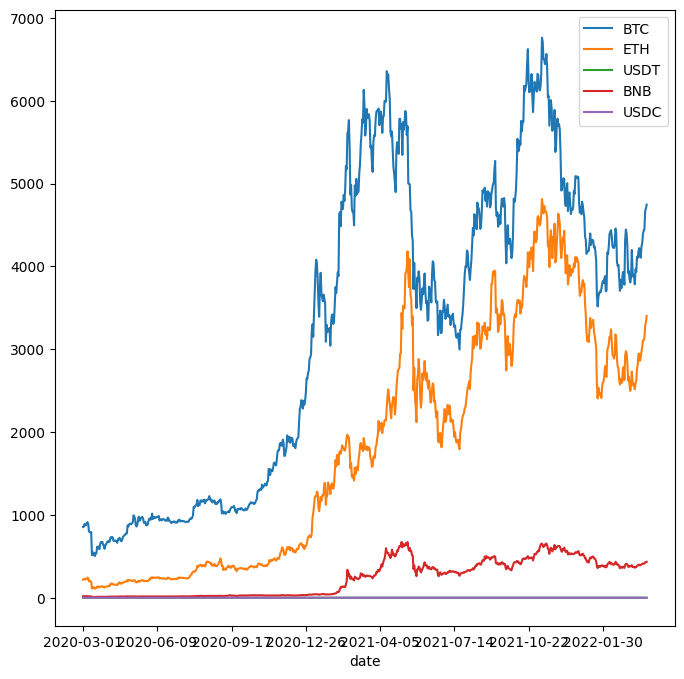

In [1068]:
df_merged_price.plot(kind='line')

In [1069]:
# 날짜 형식 변환 후 데이터 저장할 dict
dataframes_fixed={}

for symbol, (name, df) in zip(crypto_symbols, dataframes.items()):
    # 날짜별 변동 정도를 저장하는 리스트 생성
    price_changes = []
    df=dataframes.get(name)
    df.columns=['timestamp', 'price']

    for i in range(len(df['timestamp'])-1):
        date = df['timestamp'][i] # 날짜별 Timestamp 

        price_today = df['price'][i]     # 날짜별 가격
        price_tomorrow = df['price'][i+1] # 다음날 가격
        daily_change = ((price_tomorrow - price_today) / price_today) * 100
        price_changes.append((date, daily_change))
    
        dataframes_fixed[f'df_{symbol}'] = pd.DataFrame(price_changes, columns=["Date", "Price Change"])

In [1070]:
dataframes_fixed

{'df_BTC':            Date  Price Change
 0    2020-03-01      0.173192
 1    2020-03-02      3.945864
 2    2020-03-03     -1.674821
 3    2020-03-04      0.022022
 4    2020-03-05      3.199391
 ..          ...           ...
 754  2022-03-25      0.900585
 755  2022-03-26      0.403923
 756  2022-03-27      4.952217
 757  2022-03-28      0.598867
 758  2022-03-29      0.988155
 
 [759 rows x 2 columns],
 'df_ETH':            Date  Price Change
 0    2020-03-01      0.270870
 1    2020-03-02      5.818791
 2    2020-03-03     -3.331901
 3    2020-03-04      0.078032
 4    2020-03-05      1.760573
 ..          ...           ...
 754  2022-03-25     -0.018830
 755  2022-03-26      1.120504
 756  2022-03-27      4.594177
 757  2022-03-28      1.332077
 758  2022-03-29      2.170374
 
 [759 rows x 2 columns],
 'df_USDT':            Date  Price Change
 0    2020-03-01      0.263503
 1    2020-03-02     -0.105207
 2    2020-03-03      0.050627
 3    2020-03-04      0.080857
 4    2020-03-05

In [1071]:
for name, df in dataframes_fixed.items():
    print(name)

df_BTC
df_ETH
df_USDT
df_BNB
df_USDC


In [1072]:
dataframes_fixed.get('df_BTC')

,Date,Price Change
0,2020-03-01,0.173192
1,2020-03-02,3.945864
2,2020-03-03,-1.674821
3,2020-03-04,0.022022
4,2020-03-05,3.199391
...,...,...
754,2022-03-25,0.900585
755,2022-03-26,0.403923
756,2022-03-27,4.952217
757,2022-03-28,0.598867


In [1073]:
dataframes_fixed.get('df_ETH')

,Date,Price Change
0,2020-03-01,0.270870
1,2020-03-02,5.818791
2,2020-03-03,-3.331901
3,2020-03-04,0.078032
4,2020-03-05,1.760573
...,...,...
754,2022-03-25,-0.018830
755,2022-03-26,1.120504
756,2022-03-27,4.594177
757,2022-03-28,1.332077


### 전날 대비 가격 변화 정도 그래프

In [1074]:
# 날짜별 모든 암호화폐 가격을 저장할 데이터프레임 df_merged_change 생성
df_BTC=dataframes_fixed.get('df_BTC')
df_merged_change=pd.DataFrame()

# dict에 저장된 각 데이터프레임의 열 이름 변경 후 df_merged_change에 {암호화폐 symbol:날짜별 가격}을 새로운 열로 추가
for symbol, (name, df) in zip(crypto_symbols, dataframes_fixed.items()):
    df_merged_change[f'{symbol}']=df['Price Change']

df_merged_change=df_merged_change.set_index(df_BTC['Date'])


In [1075]:
df_merged_change

,BTC,ETH,USDT,BNB,USDC
Date,,,,,
2020-03-01,0.173192,0.270870,0.263503,-1.684724,0.507260
2020-03-02,3.945864,5.818791,-0.105207,4.627362,-0.309839
2020-03-03,-1.674821,-3.331901,0.050627,-1.397301,0.020563
2020-03-04,0.022022,0.078032,0.080857,2.072435,0.065596
2020-03-05,3.199391,1.760573,-0.260022,4.108137,-0.198396
...,...,...,...,...,...
2022-03-25,0.900585,-0.018830,0.011774,-0.616495,-0.109202
2022-03-26,0.403923,1.120504,-0.021734,1.136396,0.010673
2022-03-27,4.952217,4.594177,-0.073375,3.404665,0.138511


In [1076]:
df_merged_pct=df_merged_change.copy()
for symbol, (name, df) in zip(crypto_symbols, dataframes_fixed.items()):
    df_merged_pct[f'{symbol}']=df['Price Change'].pct_change() * 100
    

In [1077]:
df_merged_change['BTC'] = df_merged_change['BTC'] / 10

<Axes: xlabel='Date'>

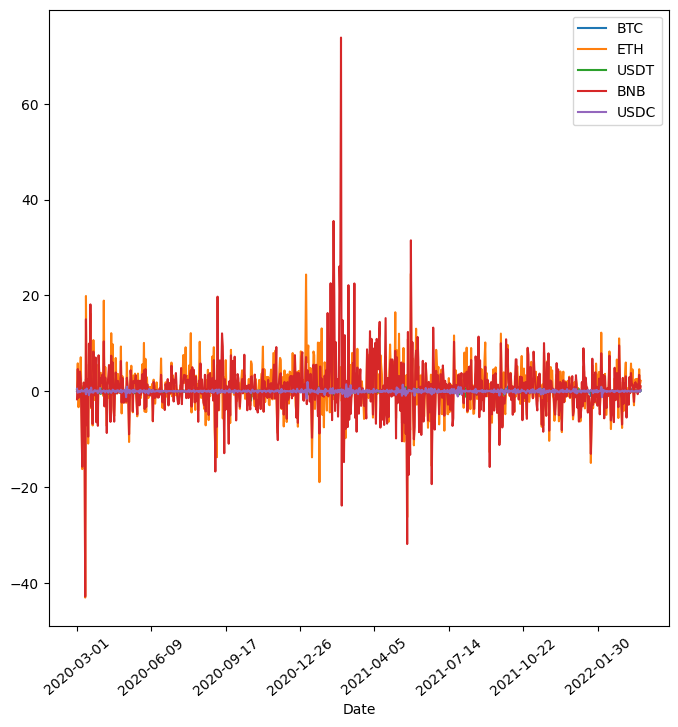

In [1078]:
df_merged_change.plot.line(rot=40)

# 데이터 취합 및 시각화

#### 1. 위에서 생성한 두 그래프를 하나의 plot에 병합
##### - df_total_changes: 2020년 3월 1일부터 2022년 3월까지 미국의 전일대비 확진자 수 그래프
##### - df_merged_change: 2020년 3월 1일부터 2022년 3월까지 주요 암호화폐의 전일대비 가격 변동률 그래프

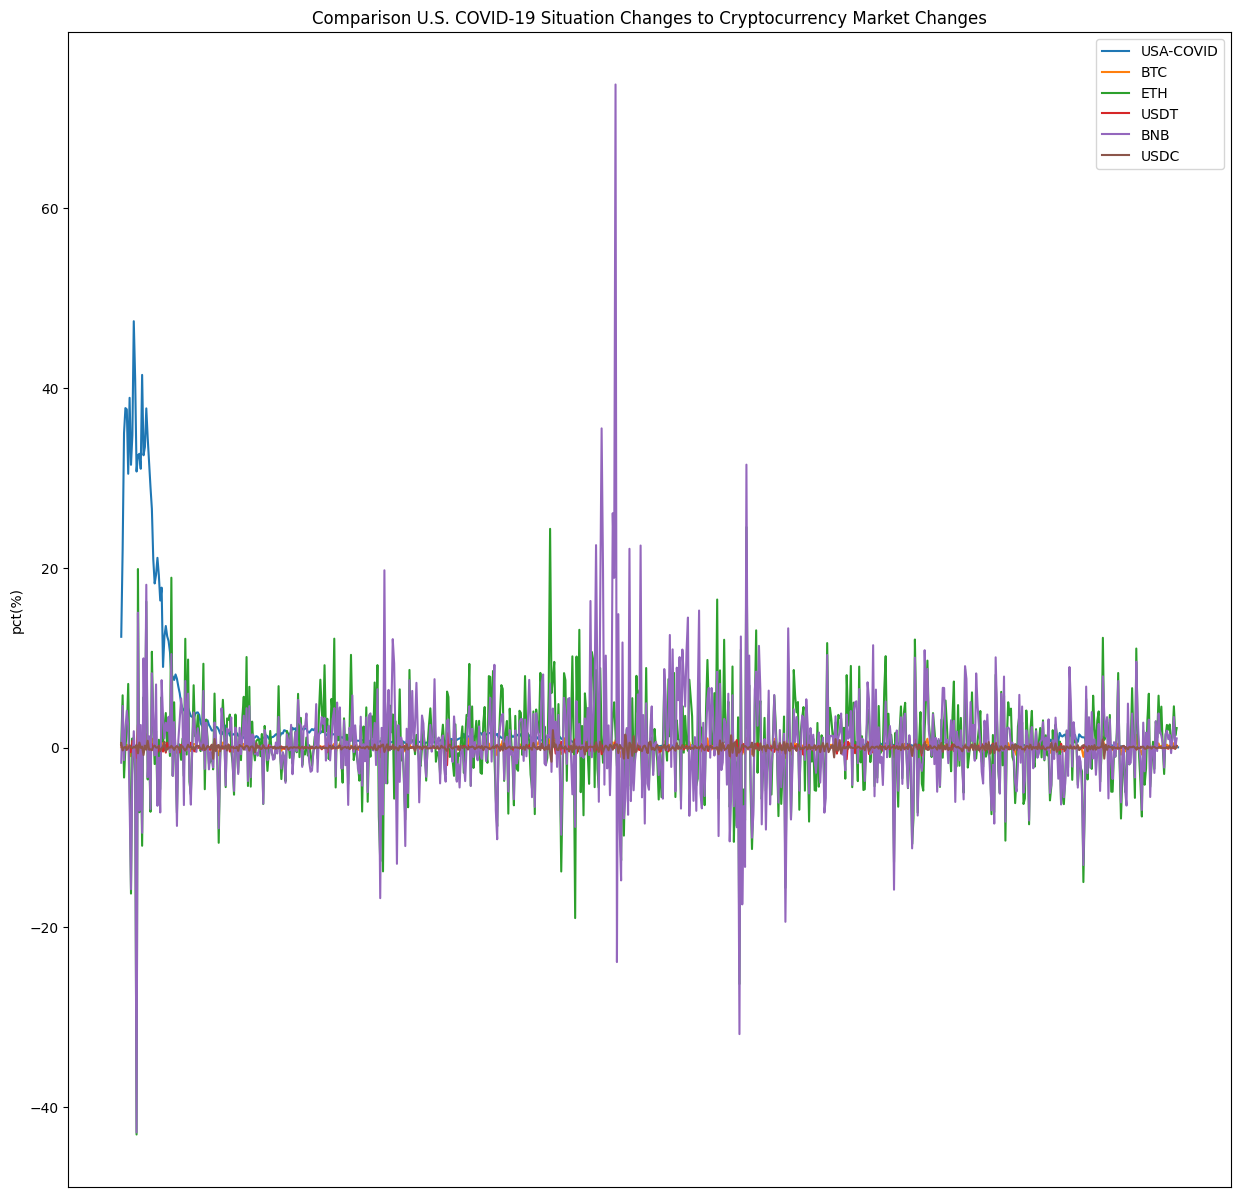

In [1097]:
plt.figure(figsize=(15,15))
plt.plot(df_total_changes, label="USA-COVID")
plt.plot(df_merged_change, label=['BTC', 'ETH', 'USDT', 'BNB', 'USDC'])
plt.legend()


plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel("pct(%)")

plt.title("Comparison U.S. COVID-19 Situation Changes to Cryptocurrency Market Changes")
plt.show()

### 2. 결과 분석
- 미국의 경우 시간이 지날수록 전일대비 코로나 바이러스 확진자 수가 감소하는 양상을 띄었다.
 - 반면 암호화폐 시장의 경우, 시기에 상관 없이 변동률이 다양한 양상을 띄었다.
 - 결론적으로 COVID pandemic과 암호화폐 시장은 연관성이 다소 떨어지는 것을 알 수 있다.